In [1]:
# Working directory must be repo's root.
from core.llmbackend.embedder_backend import AdaBackend
from core.llmbackend.llm_backend import GptBackend
from core.settings.settings import Settings
llm = GptBackend(settings=Settings())
embedder = AdaBackend(settings=Settings())

# Project Showcase: "Intelligent" Data Query and Manipulation System using LLMs.

This project features a routing agent that "understands" your query and select the appropriate 
data and actions to undertake on this data.

As you enter your query, the agent will call the relevent pipeline. Each pipeline consists of a 
series of services designed to perform specific tasks like fetching data, retrieving relevant 
information, generating visualizations, and forecasting...

## I. The routing agent.
The routing agent is prompted to choose which pipeline to call.
Currently, this agent has access to the following pipelines:

- Data Engineering: fetch data from mock database
- Data Visualization: generate simple dataviz on data from the mock databse
- Analyst: generate simple forecasting on data from the mock database
- Financial Consulting: perform RAG on the pdf chunks
- Spam: stops the conversation if the user requests non finance-related questions

As you add more pipelines in your backend, make sure to include them in the routing agent prompts.


| ![Example of routing and pipeline activation by the agent](data/img_1.png)  |
|:---------------------------------------------------------------------------:|
|          Example of routing and pipeline activation by the agent.           |



In [2]:
# The routing agent chooses which pipelines to call.

from core.services.router_service import RouterService
router = RouterService(llm)

queries = [
        "I need the Marketplaces profits of Mars 2023",
        "How can I make more profit in a competitive market with a low quality product ?",
        "I need to see a histogram of the profits in 2023",
        "I need a forecasting of the cost of Business Operations from Jan 2022 to May 2023",
        "This summer's weather was pretty bad, don't you think ?"
    ]
for query in queries:
    print("-*" * 55)
    print("User query: ", query) 
    print("Pipeline: ", router.route(query)) 

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
User query:  I need the Marketplaces profits of Mars 2023
Pipeline:  Data Engineering
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
User query:  How can I make more profit in a competitive market with a low quality product ?
Pipeline:  Financial Consulting
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
User query:  I need to see a histogram of the profits in 2023
Pipeline:  Data Visualization
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
User query:  I need a forecasting of the cost of Business Operations from Jan 2022 to May 2023
Pipeline:  Analyst
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
User query:  This summer's w

## II. Data Engineering: retrieving data from the Excel file.
The Excel file was split into multiple pandas dataframe, representing a ficticious database with 
multiple tables.
A simple query engine has been developped to fetch data from those tables (using the table name, 
columns names and start/end dates).

A "Data Engineer" agent is tasked to generate the arguments of this query engine.

| ![Example of routing and pipeline activation by the agent](data/img_2.png) |
|:--------------------------------------------------------------------------:|
|        The DE agent generates a databse query sent to the db engine        |

In [3]:
# The data engineer agent simply returns the relevent data from our mock database. 

from core.services.db_query_service import DbQueryEngine
engine = DbQueryEngine(llm)

queries = [
        "I need the total profit of Mars 2023",
        "I need to see the compositions of the credit card costs for 2023",
        "I need a forecasting of the cost of Business Operations from Jan 2022 to May 2023",
    ]

for query in queries:
    table_filtered, table_name = engine.request_tunnel(query)
    print("-*" * 55)
    print("User query: ", query) 
    print("Fetched table: ", table_name)
    display(table_filtered.head())

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
User query:  I need the total profit of Mars 2023
Fetched table:  Profit_Centers_Table


,total_gross_profit
2023-03-01,23003.735255


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
User query:  I need to see the compositions of the credit card costs for 2023
Fetched table:  Credit_Cards_Costs_Table


,total_credit_card_fees,enterprise,mid_market,a1,marketplaces,small+,small,local,editions,other
2023-01-01,-672.352666,-282.118081,-390.234586,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-02-01,-958.834962,-712.825406,-246.009556,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-01,-1569.262932,-1236.663900,-332.599032,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-01,-1762.886289,-1183.083528,-579.802760,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-01,-2064.646871,-1647.813937,-416.832934,0.0,0.0,0.0,0.0,0.0,0.0,0.0


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
User query:  I need a forecasting of the cost of Business Operations from Jan 2022 to May 2023
Fetched table:  External_Cost_Centers_Table


,business_operations
2022-01-01,-1306.434758
2022-02-01,-356.925054
2022-03-01,-53.571787
2022-04-01,-393.545334
2022-05-01,-369.124191


## III. Data Visualisation: generating simple dataviz from retrieved data
This pipeline is used to generate dataviz.
This pipeline first uses the Data Engineering service to fetch data.
A second agent is tasked in creating arguments for our dataviz engine.

Currently only 3 ruff dataviz are implemented:
1. Plotting simple time series
2. Generating histograms to see distributions
3. Generating pie charts to see compositions

| ![Example of routing and pipeline activation by the agent](data/img_3.png)  |
|:---------------------------------------------------------------------------:|
|                   The dataviz also exploits the DE agent.                   |

User query:  Show me the evolution of our total profits from the entire years of 2022 and 2023


C:\Users\FAGN01241\AppData\Local\Temp\ipykernel_28860\1118587029.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


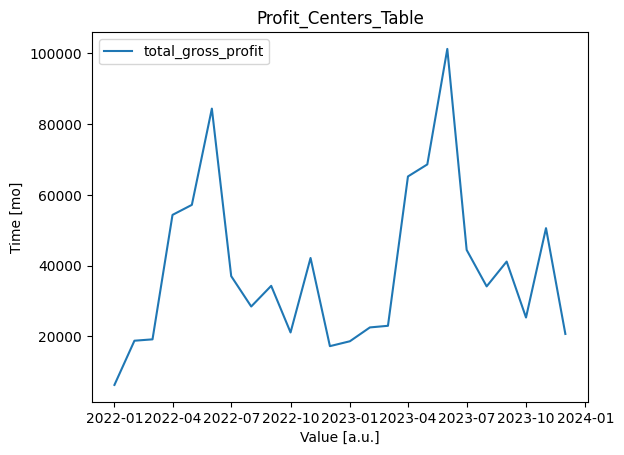

In [4]:
# A user query is used to fetch and visualize the data.
from core.services.dataviz_service import dataviz_tunnel

query = "Show me the evolution of our total profits from the entire years of 2022 and 2023"
_, _, figs = dataviz_tunnel(query, llm)
print("User query: ", query)
for fig in figs:
    fig.show()

User query:  I need to see the compositions of the transactions for the month of may 2022, ommiting the total number of transactions


C:\Users\FAGN01241\AppData\Local\Temp\ipykernel_28860\15509542.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


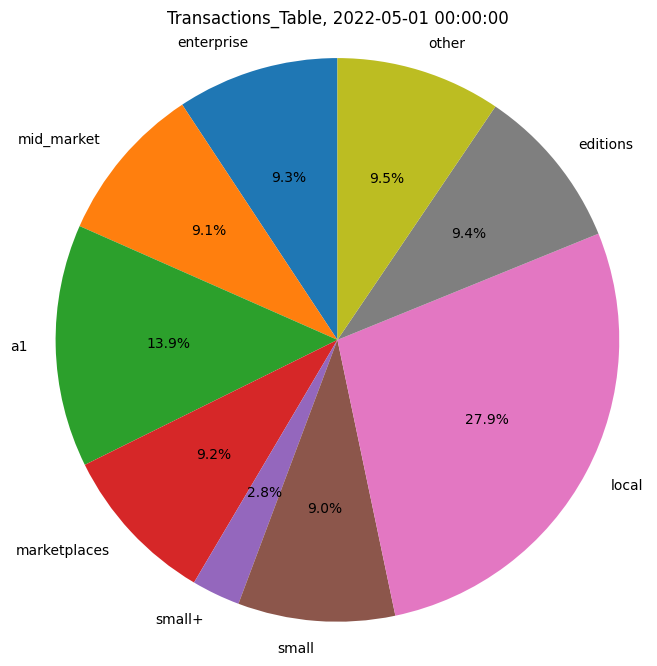

In [5]:
query = "I need to see the compositions of the transactions for the month of may 2022, ommiting the total number of transactions"
_, _, figs = dataviz_tunnel(query, llm)
print("User query: ", query)
for fig in figs:
    fig.show()
    

User query:  What is the total gross profit distribution ?


C:\Users\FAGN01241\AppData\Local\Temp\ipykernel_28860\853322014.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


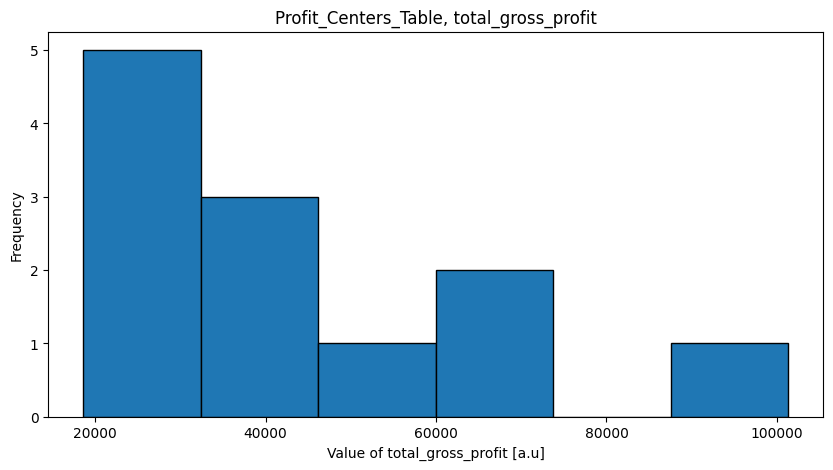

In [6]:
query = "What is the total gross profit distribution ?"
_, _, figs = dataviz_tunnel(query, llm)
print("User query: ", query)
for fig in figs:
    fig.show()

## IV. Analyst: generating a simple forecast on retrieved data
This service may be used to generate forecasting on your data.
This pipeline first uses the Data Engineering service to fetch data.
A second agent is tasked in creating arguments for our ARIMA method.
This agent may also generate optimistic, pessimistic and most-likely scenarios.

User query:  Can I see a forecast of the net income in a pessimistic scenario ? take the data from 2022 to 2023


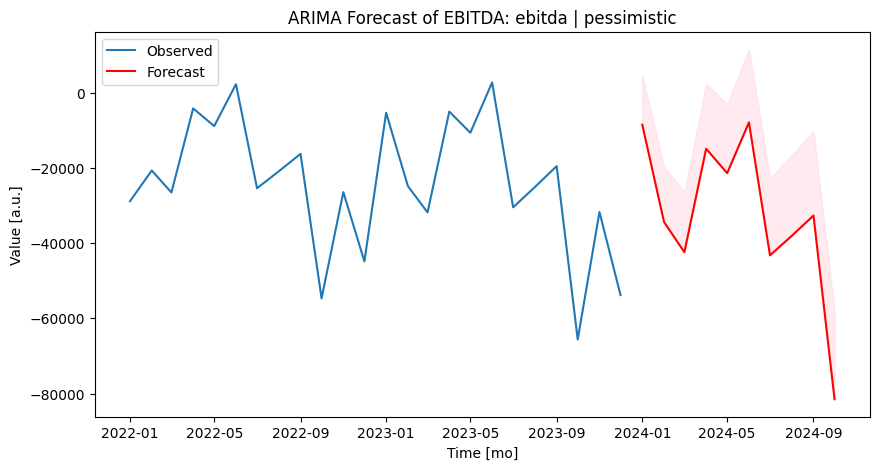

In [7]:
from core.services.forecast_service import ForecastService
engine = ForecastService(llm)

query = "Can I see a forecast of the net income in a pessimistic scenario ? take the data from 2022 to 2023"

print("User query: ", query)
_, _, figs = engine.forecast_tunnel(query)
for fig in figs:
    fig.show()

## V. Financial Consulting: a simple RAG on the PDF.
This agent is a vanilla RAG, with no particular features
After fetching the chunks, an agent is tasked to summarize them for the customer-facing agent 
which will then answer your question.

In [8]:
from core.services.rag_service import RagService, VECTOR_STORE_PATH

rag_service = RagService(embedder=embedder, llm=llm, vector_store_path=VECTOR_STORE_PATH)

queries = ["I do not understand the concept of PNL, can you explain to me simple words ?",
           "What are some typical modelling tools for forecasting profits ?",
           "Is sale growth considered important ? How does one measure sales growth "
           "(year-to-year) ?"]

for query in queries:
    resp = rag_service.rag_tunnel(query=query)
    print("-*" * 55)
    print("User query: ", query) 
    print(resp)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
User query:  I do not understand the concept of PNL, can you explain to me simple words ?
Sure! PNL stands for Profit and Loss. It is a financial statement that shows the revenues, expenses, and resulting profit or loss of a company over a specific period of time, usually a year. 

In simple terms, the PNL statement helps you understand how much money a company made or lost during a certain period. It includes all the income the company earned from its operations, such as sales of products or services, as well as any expenses it incurred, such as salaries, rent, and utilities.

The PNL statement starts with the company's total revenue and then subtracts all the expenses to calculate the net income or profit. If the expenses are higher than the revenue, it will result in a net loss.

The PNL statement is important because it provides a snapshot of a company's financial performa

# Chaining it all together
We may now use the again router to call each of those pipelines as needed

In [9]:
from core.services.pipelines import run_system

In [10]:
# RAG
query = "Explain to me the concept of PnL, how to compute it, and what are other related quantities"
print(run_system(query))

Pipeline name: Financial Consulting
User query: Explain to me the concept of PnL, how to compute it, and what are other related quantities
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
LLM response:
The concept of PnL, or Profit and Loss, is a financial statement that summarizes the revenues, costs, and expenses incurred during a specific period. It provides a snapshot of a company's financial performance over a given time frame.

To compute the PnL, you start with the sales revenue and subtract the cost of goods sold (COGS) and operating expenses. The formula for calculating PnL is:

PnL = Sales Revenue - COGS - Operating Expenses

Sales revenue represents the total amount of money generated from the sale of goods or services. COGS includes the direct costs associated with producing or delivering those goods or services. Operating expenses encompass all other costs incurred in running the business, such as rent, salaries

In [11]:
# Fetch raw data
query = "I need the Marketplaces and small business profits from march to july 2023"
print(run_system(query))

Pipeline name: Data Engineering
User query: I need the Marketplaces and small business profits from march to july 2023
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Table name:
Profit_Centers_Table

            marketplaces  small
2023-03-01           0.0    0.0
2023-04-01           0.0    0.0
2023-05-01           0.0    0.0
2023-06-01           0.0    0.0
2023-07-01           0.0    0.0
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_


Pipeline name: Data Visualization
User query: Show me the evolution of our total transactions, whole data
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Table name:
Transactions_Table

            total_transactions
2022-01-01       152987.508148
2022-02-01       160132.117379
2022-03-01       164218.516480
2022-04-01       168271.078904
2022-05-01       164393.114747
2022-06-01       175954.204009
2022-07-01       179866.158218
2022-08-01       189330.549152
2022-09-01       193084.454346
2022-10-01       205046.144121
2022-11-01       215191.587558
2022-12-01       223864.232979
2023-01-01       157029.932492
2023-02-01       192158.540855
2023-03-01       197062.219776
2023-04-01       201925.294684
2023-05-01       197271.737697
2023-06-01       211145.044811
2023-07-01       215839.389861
2023-08-01       227196.658983
2023-09-01       231701.345215
2023-10-01       246055.372945
2023-11-01       258229.905070
2023-12

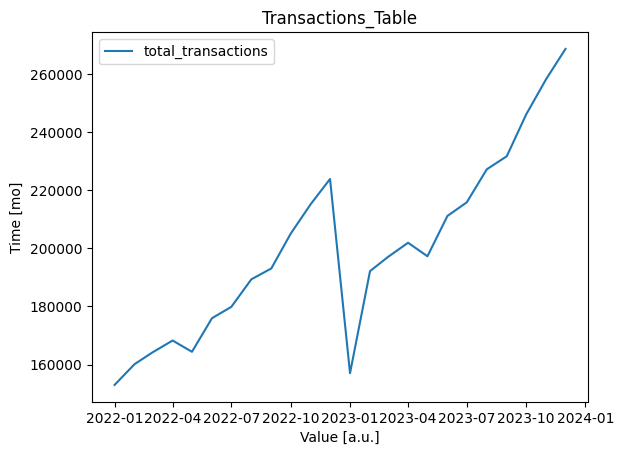

In [12]:
# DATAVIZ
query = "Show me the evolution of our total transactions, whole data"
print(run_system(query))

Pipeline name: Analyst
User query: Show me the forecast of our total profits. Take the entire data.
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
LLM response:
Past Performance is Not Indicative of Future Results.
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Table name:
Profit_Centers_Table

            total_gross_profit
2022-01-01         6284.856826
2022-02-01        18785.668873
2022-03-01        19169.779379
2022-04-01        54361.024383
2022-05-01        57197.358622
2022-06-01        84410.327494
2022-07-01        37047.134474
2022-08-01        28456.679464
2022-09-01        34302.889997
2022-10-01        21122.145116
2022-11-01        42178.958683
2022-12-01        17248.957136
2023-01-01        18632.087851
2023-02-01        22542.802647
2023-03-01        23003.735255
2023-04-01        65233.229260
2023-05-01        68636.830346
2023-06-01       1

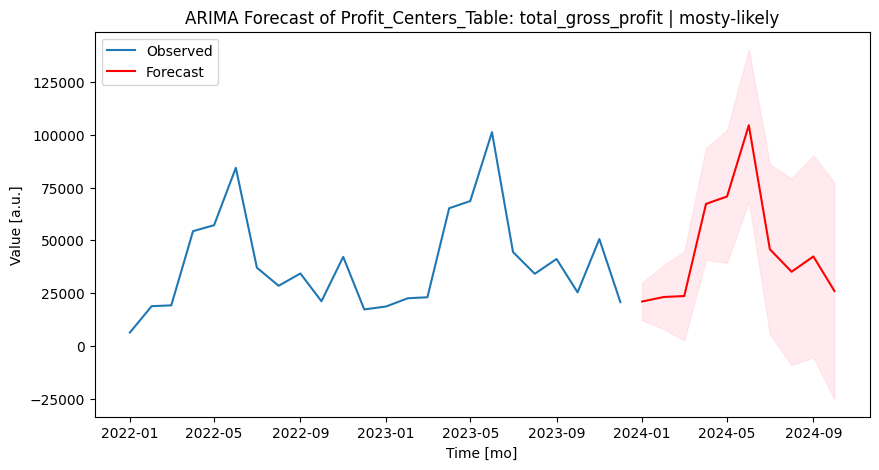

In [13]:
# Forecasting
query = "Show me the forecast of our total profits. Take the entire data."
print(run_system(query))

Pipeline name: Data Visualization
User query: I need to see a histogram of the total profits in 2023
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Table name:
Profit_Centers_Table

            total_gross_profit
2023-01-01        18632.087851
2023-02-01        22542.802647
2023-03-01        23003.735255
2023-04-01        65233.229260
2023-05-01        68636.830346
2023-06-01       101292.392993
2023-07-01        44456.561369
2023-08-01        34148.015357
2023-09-01        41163.467996
2023-10-01        25346.574140
2023-11-01        50614.750420
2023-12-01        20698.748563
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_

 Figure: [<Figure size 1000x500 with 1 Axes>]


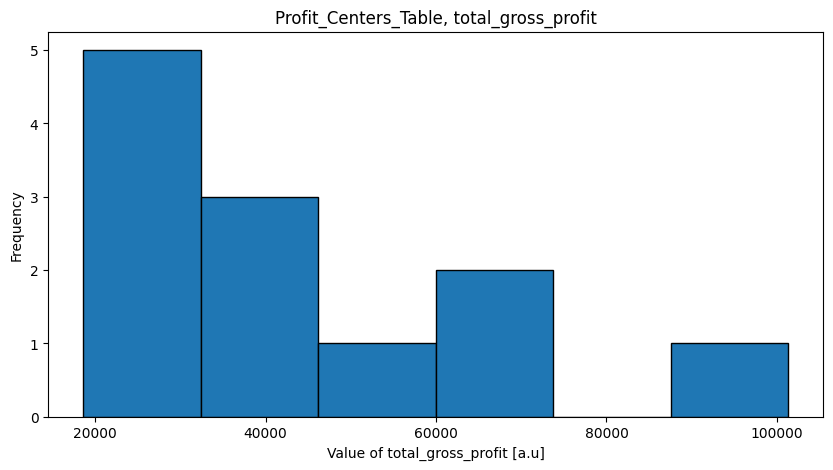

In [14]:
# DATAVIZ
query = "I need to see a histogram of the total profits in 2023"
print(run_system(query))

Pipeline name: Data Visualization
User query: I want to see the compositions of my transactions in march 2023, ommit the total transactions
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Table name:
Transactions_Table

              enterprise    mid_market            a1  marketplaces  \
2023-03-01  18297.327742  17931.381187  27445.991612  18114.354464   

                 small+         small         local      editions  \
2023-03-01  5489.198322  17748.407909  54891.983225  18480.301019   

                   other  
2023-03-01  18663.274296  
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_

 Figure: [<Figure size 800x800 with 1 Axes>]


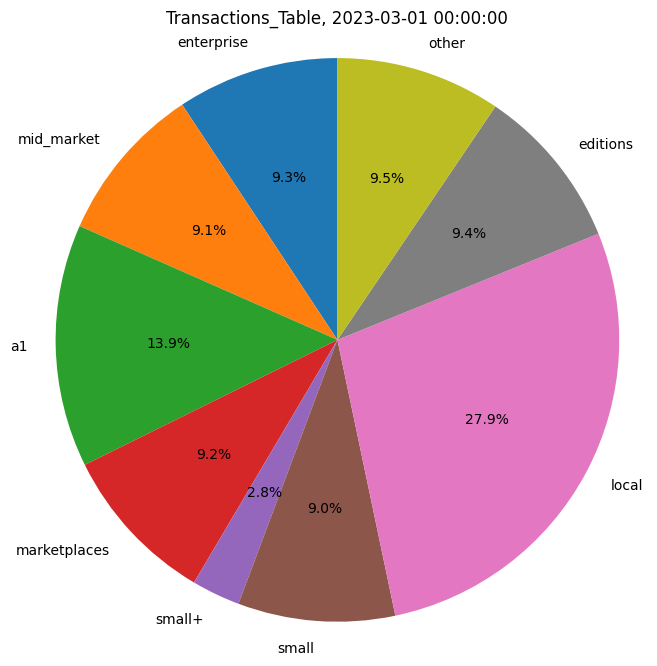

In [15]:
# DATAVIZ
query = ("I want to see the compositions of my transactions in march 2023, ommit the total "
         "transactions")
print(run_system(query))

In [16]:
# RAG
query = "This summer's weather was pretty bad, don't you think ?"
print(run_system(query))

Pipeline name: Spam
User query: This summer's weather was pretty bad, don't you think ?
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
LLM response:
Please do not spam me
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_


My aim was to create a POC of what I've been shown during our discussions. This is in no way 
optimized or performant.

## Improvement areas and notes for reviewers
**I have chosen to use as few high-level packages as possible to make the logic obvious.**
- RAG similarity scores are computed manually
- Embeddings are stored in pandas dataframes, so is the mock database
- LLM/Embedders are called using the OpenAI API rather than Langchain
- "Agents" are created and called manually

Huge improvements (both in readability and stability) would be achieved by using
Langchain agents, proper vector stores etc.

**Must-do**:
- Combine RAG on pdf and dataframes to gain insights on analysis

**Quick wins:**
- Standard good practices such as implementing unit tests, error and log
  management etc...
- Better prompts management (currently stored as variables in .py files)
- Use Langchain, Pandas-LLM, Langfuse, a vector store etc.
- Parse pdfs with Azure DocIntel or AWS Textract which are hard to beat
- Retries: when dealing with agents, retries are typically used to improve robustness. A retry
  consists in feeding back an error message to the agent, with a prompt to correct its previous
  mistake. Because retries require proper error management I have ommited them.
- A simple Streamlit front could be implemented, I made one a while ago that might fit (https://github.com/AntoonGa/CodeConverser)

**Not-so-quick wins**:
- Make a train-of-thought routing agent that will generate the pipelines on-the-fly.
- Mix RAG and Tabular data access for better data usage
- Implement conversationnal memory and continuous conversation
- Mouting the data in an SQL database and generate SQL queries with the agents rather than pandas 
filters

**If I had even more time**
- Clearly separate customer facing services (Python LLMs) and backend APIs (dataviz, SQL engine, 
forecasting as true external APIs). This would make the architecture scalable and unentangled.
- The parsing, chunking and vectorization method is vanilla:
  - Parsing is done the simplest way possible using the Pymupdf package
  - The only metadata retrieved is the chapter, used as a prefix during chunk embeddings
  - Chunking is done using newline delimeters with a target size between 500 - 700 char
  - No paragraph or page reconstruction is done
  - Chunks containing figures and tables are simply dropped rather than reconstructed properly
  - No reranking or other fancy RAG methods